In [5]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('data/DailyDelhiClimateTrain.csv', low_memory=False)
print(df.head())
df.describe()
#print number of rows
print("number of rows: " + str(df.shape[0]))


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
number of rows: 1462


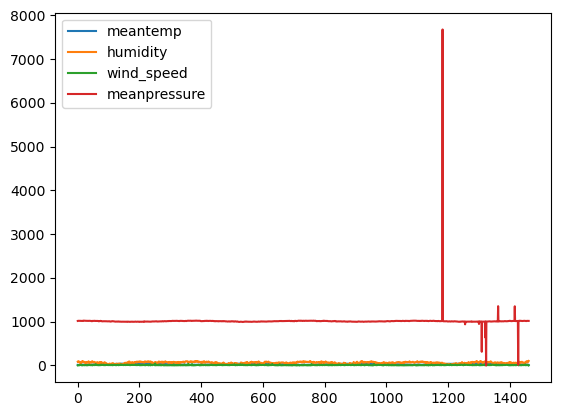

In [26]:
df.plot()
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2770.149
Date:                Tue, 14 May 2024   AIC                           5552.297
Time:                        18:26:03   BIC                           5584.019
Sample:                    01-01-2013   HQIC                          5564.130
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2122      0.021     -9.896      0.000      -0.254      -0.170
ar.L2         -0.1524      0.024     -6.317      0.000      -0.200      -0.105
ar.L3         -0.1827      0.025     -7.229      0.0

/Users/maksymmalicki/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/maksymmalicki/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/maksymmalicki/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


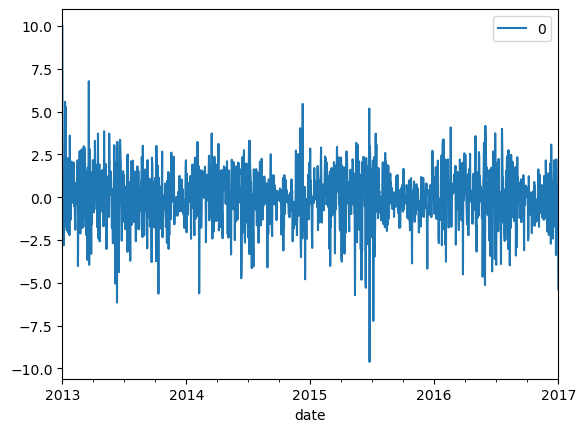

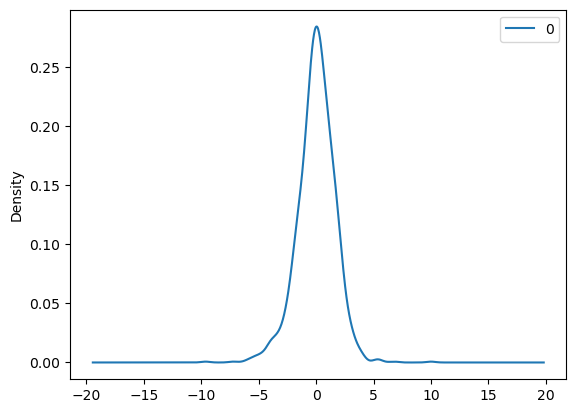

                 0
count  1462.000000
mean      0.009675
std       1.632545
min      -9.625116
25%      -0.871302
50%       0.074147
75%       1.022625
max      10.000000


In [27]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
model = ARIMA(df['meantemp'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# Create model to predict temperature

In [7]:
# split into train and test sets
X = df['meantemp'].values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
pyplot.plot(test)
pyplot.plot(predictions, color='red')
#add decription to plot
pyplot.title('Mean Temperature')
pyplot.xlabel('Days')
pyplot.ylabel('Temperature')
pyplot.show()

predicted=34.168866, expected=34.750000
predicted=35.140764, expected=35.125000
predicted=35.200063, expected=32.250000
predicted=32.814618, expected=34.250000
predicted=34.250045, expected=29.375000
predicted=30.453632, expected=31.625000
predicted=31.709889, expected=28.625000
predicted=29.735944, expected=31.875000
predicted=31.408340, expected=32.625000
predicted=32.614927, expected=33.375000
predicted=32.632982, expected=35.000000
predicted=34.396204, expected=36.500000
predicted=35.642531, expected=37.625000
predicted=36.860710, expected=36.625000
predicted=36.316320, expected=35.625000
predicted=35.626844, expected=35.875000
predicted=35.986773, expected=31.125000
predicted=32.216737, expected=27.000000
predicted=28.492112, expected=31.000000
predicted=31.555931, expected=32.375000
predicted=32.439025, expected=33.875000
predicted=33.253696, expected=35.125000
predicted=34.455664, expected=35.875000
predicted=35.000154, expected=33.125000
predicted=33.182537, expected=30.375000
